# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [11]:
medical.shape

(1338, 8)

In [12]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Charges in the given data are exponentially distributed and majority values are biased towards value less than 20000

In [13]:
md_charges = medical.charges
chrgs_mean = md_charges.mean()
chrgs_std = md_charges.std()
print(chrgs_mean)

13270.422265141257


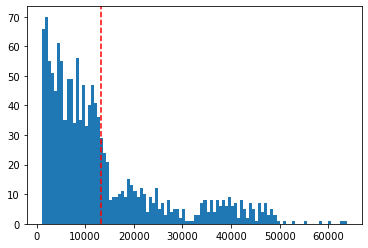

In [14]:
_ = plt.hist(md_charges,bins = 100)
_ = plt.axvline(chrgs_mean, color='r', linestyle='--')
plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Bootstraping

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Appropriate confidence interval in this case is 95% interval.As our admin is concerned about mean going doing below 12000, therefore a one sided interval is suitable here. Critaical value for given distribution is -1.6991270265334977 (Left Side). Yes there is possibilty that actual average can go below 12000.

In [15]:
def boot_strap_sample(n):
    return np.mean(np.random.choice(md_charges, n))

In [16]:
bs_md_charges = [boot_strap_sample(500) for i in range(500)]

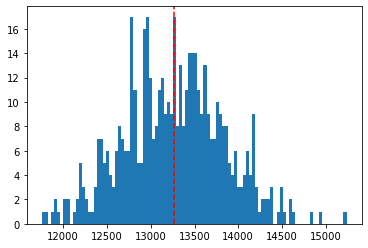

In [17]:
_ = plt.hist(bs_md_charges,bins = 100)
_ = plt.axvline(np.mean(bs_md_charges), color='r', linestyle='--')
plt.show()

In [18]:
mu = np.mean(bs_md_charges)
sigma = np.std(bs_md_charges)

ppf = norm.ppf(0.95)
ste = np.std(bs_md_charges)/np.sqrt(500-1)

margin_of_error = ppf*ste
lower_95 = mu - margin_of_error
upper_95 = mu + margin_of_error

print('Margin of error: ',margin_of_error)
print('Confidence Interval:', lower_95,'-',upper_95)

Margin of error:  42.395153702180544
Confidence Interval: 13222.850709585007 - 13307.641016989368


__A:__ As you can observe the confidence interval is above 12,000. Hence the administrators need not worry

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ __Null Hypothesis:__ People with and without insurance are not charged differently.


__Alternate Hypothesis__ People with insurance are charged differently.

Our objective is to reject the null hypothesis

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [19]:
medical.insuranceclaim.value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [20]:
med_chrgs_insu = medical[medical['insuranceclaim'] == True].charges
med_chrgs_woinsu = medical[medical['insuranceclaim'] == False].charges

In [23]:
mean_with_insuarance=np.mean(med_chrgs_insu)
mean_without_insuarance=np.mean(med_chrgs_woinsu)
SD1=np.std(med_chrgs_insu,ddof=1)
SD2=np.std(med_chrgs_woinsu,ddof=1)
print('Mean of data with insurance',mean_with_insuarance)
print('Mean of data without insurance',mean_without_insuarance)
print('Standard Deviation of data with insurance',SD1)
print('Standard Deviation of data without insurance',SD2)

Mean of data with insurance 16423.928276537663
Mean of data without insurance 8821.421892306294
Standard Deviation of data with insurance 14045.928418802127
Standard Deviation of data without insurance 6446.510126811736


In [24]:
SDP=np.sqrt((((783-1)*SD1**2)+((555-1)*SD2**2))/(783+555-2))
print('Pooled Standard Deviation is',SDP)

Pooled Standard Deviation is 11520.034268775256


In [25]:
num=(mean_with_insuarance-mean_without_insuarance)
dino=SDP*(np.sqrt((1/783)+(1/555)))

In [26]:
TP=num/dino
DOF=783+555-2
print('T-test statistic is',TP)
print('Degree of Freedom is',DOF)

T-test statistic is 11.89329903087671
Degree of Freedom is 1336


In [29]:
p_value = stats.t.sf(abs(TP),df=DOF)*2
print('P value is',"%.35f" % p_value)

P value is 0.00000000000000000000000000000044612


In [30]:
from scipy import stats

t_st,p_val = stats.ttest_ind(med_chrgs_insu,med_chrgs_woinsu)
print(t_st,p_val)

11.893299030876712 4.461230231620717e-31


In [31]:
print('P value is',"%.35f" % p_val)

P value is 0.00000000000000000000000000000044612


__A:__ We reject the null hypothesis

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Two-Sample z-test for Comparing Two Means, we can do so using statsmodels.stats.weightstats.ztest fuction.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test